In [1]:
from training_utilities import *
from variables_to_specify_zurich import *

In [2]:
from darts.models import ExponentialSmoothing
import pandas as pd

In [3]:
df, columns_to_normalize, target_col, forecast_avg_target_col_name, avg_target_col_name, No_of_datapoints_in_one_day, start_date, end_date, delta, one_month_days, out_columns, drop_columnss, windows, index_of_one_month, one_month_window_size, date_col_name = variables_to_specify_zurich()


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply the scaler to the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
# df

In [5]:
convert_time(df, date_col_name)

,Timestamp,Value_NE5,Value_NE7,Hr [%Hr],RainDur [min],StrGlo [W/m2],T [°C],WD [°],WVs [m/s],WVv [m/s],p [hPa],year,month,day,hour,minute
0,2015-01-01 00:00:00,0.218586,0.525263,0.866349,0.000000,0.000000,0.174306,0.982917,0.056903,0.056818,0.858307,2015,1,1,0,0
1,2015-01-01 00:15:00,0.226909,0.518110,0.863513,0.000000,0.000000,0.174306,0.752111,0.072761,0.073864,0.859718,2015,1,1,0,15
2,2015-01-01 00:30:00,0.236334,0.512628,0.860563,0.000000,0.000010,0.174521,0.521306,0.089552,0.090909,0.861129,2015,1,1,0,30
3,2015-01-01 00:45:00,0.224144,0.503245,0.857613,0.000000,0.000010,0.174736,0.290472,0.106343,0.107008,0.862539,2015,1,1,0,45
4,2015-01-01 01:00:00,0.218127,0.499936,0.854776,0.000000,0.000010,0.174736,0.059667,0.122201,0.124053,0.863950,2015,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268700,2022-08-30 23:00:00,0.227133,0.435225,0.752553,0.000000,0.000019,0.634818,0.067583,0.153918,0.107008,0.626646,2022,8,30,23,0
268701,2022-08-30 23:15:00,0.217183,0.420463,0.755956,0.016000,0.000019,0.633742,0.254528,0.137127,0.088068,0.626332,2022,8,30,23,15
268702,2022-08-30 23:30:00,0.205812,0.409549,0.759360,0.032000,0.000019,0.632666,0.441472,0.120336,0.069129,0.626176,2022,8,30,23,30
268703,2022-08-30 23:45:00,0.204675,0.399823,0.762764,0.048667,0.000019,0.631375,0.628389,0.103545,0.050189,0.626019,2022,8,30,23,45


In [6]:
# compute daily average
# 144 = 24 hours * 6 datapoints in each hour
daily_avg =[]
for i in range (0, len(df),No_of_datapoints_in_one_day):
  sub_df = df[i:i+No_of_datapoints_in_one_day]
  mean = sub_df[target_col].mean()
  daily_avg.append(mean)
daily_df_avg = pd.DataFrame(daily_avg, columns=[avg_target_col_name])
daily_df_avg

,Value_NE5_avg
0,0.232784
1,0.268992
2,0.264204
3,0.202735
4,0.485139
...,...
2795,0.256065
2796,0.189917
2797,0.422587
2798,0.447816


In [7]:
daily_df_avg.iloc[:, 1:]

""
0
1
2
3
4
...
2795
2796
2797
2798


In [8]:
dates_list = []
year_ls = []
month_ls = []
day_ls = []

while start_date <= end_date:
    date  = start_date.strftime("%Y-%m-%d")
    year, month, day = date.split('-')
    year_ls.append(int(year))
    month_ls.append(int(month))
    day_ls.append(int(day))
    # dates_list.append(date)
    start_date += delta

In [9]:
# daily_df_avg.drop(daily_df_avg.index[-1], inplace=True)
daily_df_avg['year'] = year_ls
daily_df_avg['month'] = month_ls
daily_df_avg['day'] = day_ls

In [10]:
daily_df_avg = cut_data(daily_df_avg)
df = cut_data(df)

In [11]:
daily_df_avg

,Value_NE5_avg,year,month,day
1826,0.180035,2020,1,1
1827,0.202758,2020,1,2
1828,0.293286,2020,1,3
1829,0.195883,2020,1,4
1830,0.149042,2020,1,5
...,...,...,...,...
2187,0.152024,2020,12,27
2188,0.302671,2020,12,28
2189,0.300111,2020,12,29
2190,0.310721,2020,12,30


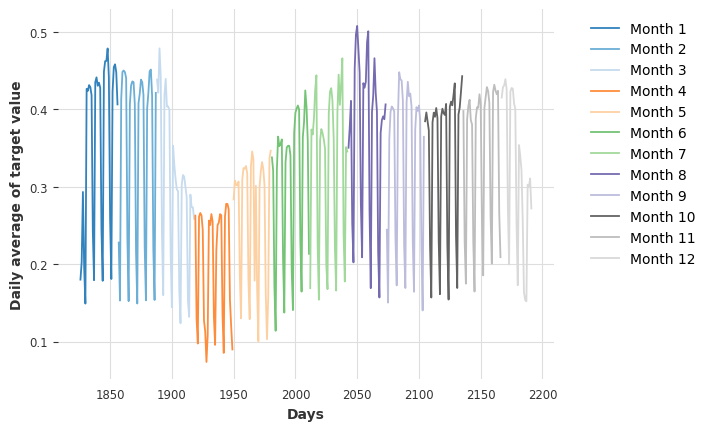

In [12]:
plot_months_patterns(daily_df_avg, one_month_days, avg_target_col_name, 0)

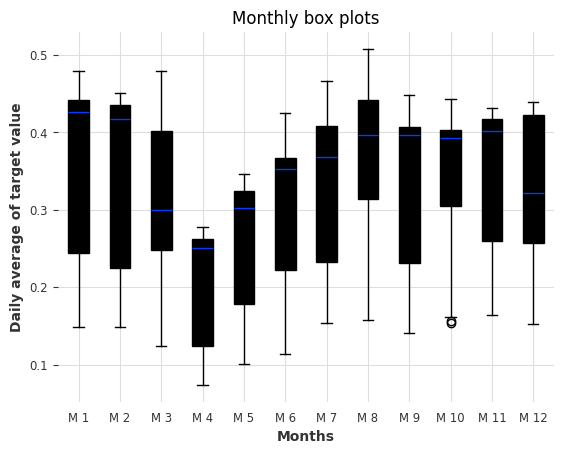

In [13]:
plot_months_patterns_box(daily_df_avg, one_month_days, avg_target_col_name, 0)


# Forecasting

In [14]:
ls_forecast_time = []
for b in range (0, len(daily_df_avg),one_month_days): 
    if b ==0:
        forecast_daily_avg = daily_df_avg[0:one_month_days]
        
        forecast_daily_avg = forecast_daily_avg.rename(columns={avg_target_col_name: forecast_avg_target_col_name})
        
        forecast_daily_avg1= forecast_daily_avg
        # start_forecasting_time = timeit.default_timer()
    else:
        
        forecast_daily_avg,forecast_time  = forecast_es(daily_df_avg[0:b][avg_target_col_name], daily_df_avg[b:b+one_month_days][avg_target_col_name], forecast_daily_avg, forecast_avg_target_col_name)
        ls_forecast_time.append(forecast_time)

# end_forecasting_time = timeit.default_timer()
# forecasting_time = end_forecasting_time - start_forecasting_time
# print("forecasting time is: ", forecasting_time)
forecasting_time = sum(ls_forecast_time)
print("forecasting time is: ", forecasting_time)

forecast_daily_avg = forecast_daily_avg.drop(columns = ['year', 'month', 'day'])


# Reset indices of both dataframes
forecast_daily_avg = forecast_daily_avg.reset_index(drop=True)
subset_daily_df_avg = daily_df_avg.iloc[:, 1:]
subset_daily_df_avg = subset_daily_df_avg.reset_index(drop=True)
forecast_daily_avg = pd.concat([forecast_daily_avg, subset_daily_df_avg], axis=1)

forecasting time is:  0.13905499900000073


In [15]:
forecast_daily_avg

,forecast_Value_NE5_avg,year,month,day
0,0.180035,2020,1,1
1,0.202758,2020,1,2
2,0.293286,2020,1,3
3,0.195883,2020,1,4
4,0.149042,2020,1,5
...,...,...,...,...
361,0.341445,2020,12,27
362,0.346777,2020,12,28
363,0.347084,2020,12,29
364,0.344595,2020,12,30


In [16]:
total_error = mean_squared_error(daily_df_avg[avg_target_col_name], forecast_daily_avg[forecast_avg_target_col_name])
print("total forecasting error is: ",total_error)


total forecasting error is:  0.011176766305721463


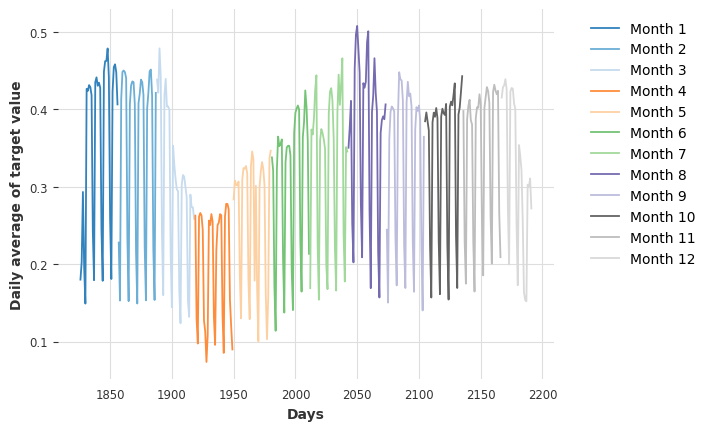

In [17]:
plot_months_patterns(daily_df_avg, one_month_days, avg_target_col_name, 0)


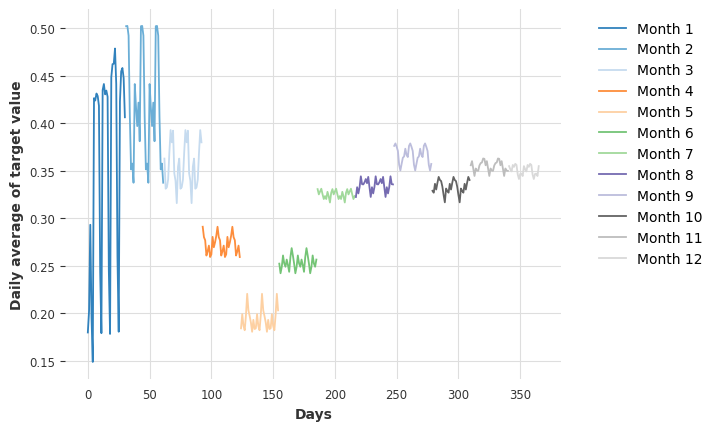

In [18]:
plot_months_patterns(forecast_daily_avg, one_month_days, forecast_avg_target_col_name, 0)

# compute similarity

In [19]:
daily_data_for_each_month = make_daily_data_for_each_month(daily_df_avg, avg_target_col_name, one_month_days)
daily_data_for_each_month

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.180035,0.227878,0.153685,0.273525,0.154478,0.156043,0.424479,0.238590,0.386185,0.405017,0.169194,0.431802
1,0.202758,0.152932,0.421306,0.258420,0.119840,0.337015,0.403314,0.177544,0.390995,0.386402,0.393457,0.424323
2,0.293286,0.413325,0.438428,0.262691,0.089802,0.346557,0.359535,0.351254,0.387245,0.224924,0.402364,0.419508
3,0.195883,0.448446,0.421604,0.129573,0.283681,0.337941,0.213401,0.345549,0.406434,0.140191,0.422101,0.423991
4,0.149042,0.450220,0.478865,0.097421,0.307869,0.320847,0.168969,0.350415,0.244493,0.364559,0.442906,0.265322
5,0.426489,0.448107,0.442057,0.261419,0.302621,0.171746,0.374040,0.377281,0.150277,0.384653,0.397839,0.209033
6,0.424007,0.440488,0.238330,0.266098,0.301690,0.113909,0.367554,0.410966,0.361744,0.396059,0.229969,0.415243
7,0.431373,0.232767,0.159948,0.262838,0.306729,0.321870,0.387971,0.252860,0.396827,0.384626,0.174806,0.428638
8,0.428729,0.152256,0.417918,0.244228,0.185180,0.364827,0.424679,0.202292,0.403737,0.372880,0.387204,0.431027
9,0.418422,0.406446,0.439368,0.127316,0.129887,0.352480,0.444050,0.453049,0.401390,0.223996,0.404537,0.439032


In [20]:
filtered_wess_similarity_dictionary = wasserstein_dist(daily_data_for_each_month)
new_filtered_wess_similarity_dictionary = convert_sim_to_month(filtered_wess_similarity_dictionary, 2)

column is :  month_0
column is :  month_1


column is :  month_2


column is :  month_3


column is :  month_4


column is :  month_5


column is :  month_6


column is :  month_7


column is :  month_8


column is :  month_9


column is :  month_10


column is :  month_11


{5: 2, 6: 1, 7: 0, 8: 6, 10: 8, 11: 6}
wess_similarity_time is:  0.027036833999999565
dictionary_1 is:  {6: 3, 7: 2, 8: 1, 9: 7, 11: 9, 12: 7}


final_similarities are:  {'M6, 2020': 'M3, 2020', 'M7, 2020': 'M2, 2020', 'M8, 2020': 'M1, 2020', 'M9, 2020': 'M7, 2020', 'M11, 2020': 'M9, 2020', 'M12, 2020': 'M7, 2020'}


In [21]:
filtered_tvd_similarity_dictionary = tvd(daily_data_for_each_month)
new_filtered_tvd_similarity_dictionary = convert_sim_to_month(filtered_tvd_similarity_dictionary,2 )


tvd_similarity_time is : 0.0007164580000003085
{5: 2, 6: 0, 7: 1, 8: 6, 9: 6, 10: 2, 11: 8}
dictionary_1 is:  {6: 3, 7: 1, 8: 2, 9: 7, 10: 7, 11: 3, 12: 9}


final_similarities are:  {'M6, 2020': 'M3, 2020', 'M7, 2020': 'M1, 2020', 'M8, 2020': 'M2, 2020', 'M9, 2020': 'M7, 2020', 'M10, 2020': 'M7, 2020', 'M11, 2020': 'M3, 2020', 'M12, 2020': 'M9, 2020'}


In [22]:
for idx, (pair_A, pair_B) in enumerate(zip_longest(new_filtered_wess_similarity_dictionary.items(), new_filtered_tvd_similarity_dictionary.items()), start=1):
    # Handle None for pair_A
    if pair_A is not None:
        key_A, value_A = pair_A
    else:
        key_A, value_A = 'none', 'none'
    
    # Handle None for pair_B
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'
    
    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")
    

1 & M6, 2020 & M3, 2020 & M6, 2020 & M3, 2020 \\
\hline
2 & M7, 2020 & M2, 2020 & M7, 2020 & M1, 2020 \\
\hline
3 & M8, 2020 & M1, 2020 & M8, 2020 & M2, 2020 \\
\hline
4 & M9, 2020 & M7, 2020 & M9, 2020 & M7, 2020 \\
\hline
5 & M11, 2020 & M9, 2020 & M10, 2020 & M7, 2020 \\
\hline
6 & M12, 2020 & M7, 2020 & M11, 2020 & M3, 2020 \\
\hline
7 & none & none & M12, 2020 & M9, 2020 \\
\hline


In [23]:
forecasted_daily_data_for_each_month = make_daily_data_for_each_month(forecast_daily_avg, forecast_avg_target_col_name, one_month_days)

In [24]:
forecasted_daily_data_for_each_month

,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,0.180035,0.502198,0.357689,0.392945,0.265460,0.198278,0.261049,0.331213,0.332941,0.375281,0.336408,0.360246
1,0.202758,0.502483,0.337541,0.380027,0.271392,0.220661,0.252615,0.325446,0.344308,0.370963,0.330386,0.352435
2,0.293286,0.492247,0.362928,0.291231,0.259382,0.203302,0.249155,0.320387,0.335986,0.356425,0.337356,0.344664
3,0.195883,0.407517,0.331254,0.280273,0.184385,0.252425,0.256707,0.323466,0.335777,0.350443,0.343661,0.352492
4,0.149042,0.351548,0.332746,0.277047,0.199327,0.242299,0.330817,0.322546,0.376313,0.357288,0.340440,0.350229
5,0.426489,0.357689,0.340798,0.260951,0.187017,0.248989,0.325276,0.332826,0.378876,0.329032,0.355903,0.350083
6,0.424007,0.337541,0.369190,0.265460,0.182372,0.261049,0.328302,0.326285,0.375281,0.327073,0.360246,0.355010
7,0.431373,0.441345,0.392945,0.271392,0.198278,0.252615,0.331213,0.332941,0.370963,0.336408,0.352435,0.351671
8,0.428729,0.417167,0.380027,0.259382,0.220661,0.249155,0.325446,0.344308,0.356425,0.330386,0.344664,0.349458
9,0.418422,0.397124,0.392239,0.262173,0.203302,0.256707,0.320387,0.335986,0.350443,0.337356,0.352492,0.356217


In [25]:
forecasted_filtered_wess_similarity_dictionary = wasserstein_dist_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_wess_similarity_dictionary = convert_sim_to_month(forecasted_filtered_wess_similarity_dictionary, 2)


{5: 3, 7: 5, 8: 6, 9: 5, 10: 5, 11: 5}
wess_similarity_time is:  0.01009016699999954
dictionary_1 is:  {6: 4, 8: 6, 9: 7, 10: 6, 11: 6, 12: 6}


final_similarities are:  {'M6, 2020': 'M4, 2020', 'M8, 2020': 'M6, 2020', 'M9, 2020': 'M7, 2020', 'M10, 2020': 'M6, 2020', 'M11, 2020': 'M6, 2020', 'M12, 2020': 'M6, 2020'}


In [26]:
forecasted_filtered_tvd_similarity_dictionary = tvd_forecasted(forecasted_daily_data_for_each_month, daily_data_for_each_month)
new_forecasted_filtered_tvd_similarity_dictionary = convert_sim_to_month(forecasted_filtered_tvd_similarity_dictionary,2 )


tvd_similarity_time is : 0.0007412079999999932
{2: 0, 5: 3, 6: 4, 7: 5, 8: 5, 9: 5, 10: 5, 11: 5}
dictionary_1 is:  {3: 1, 6: 4, 7: 5, 8: 6, 9: 6, 10: 6, 11: 6, 12: 6}


final_similarities are:  {'M3, 2020': 'M1, 2020', 'M6, 2020': 'M4, 2020', 'M7, 2020': 'M5, 2020', 'M8, 2020': 'M6, 2020', 'M9, 2020': 'M6, 2020', 'M10, 2020': 'M6, 2020', 'M11, 2020': 'M6, 2020', 'M12, 2020': 'M6, 2020'}


In [27]:
for idx, (pair_A, pair_B) in enumerate(
        zip_longest(new_forecasted_filtered_wess_similarity_dictionary.items(), new_forecasted_filtered_tvd_similarity_dictionary.items()),
        start=1):
    # Handle None for pair_A
    if pair_A is not None:
        key_A, value_A = pair_A
    else:
        key_A, value_A = 'none', 'none'

    # Handle None for pair_B
    if pair_B is not None:
        key_B, value_B = pair_B
    else:
        key_B, value_B = 'none', 'none'

    print(f"{idx} & {key_A} & {value_A} & {key_B} & {value_B} \\\\")
    print("\\hline")


1 & M6, 2020 & M4, 2020 & M3, 2020 & M1, 2020 \\
\hline
2 & M8, 2020 & M6, 2020 & M6, 2020 & M4, 2020 \\
\hline
3 & M9, 2020 & M7, 2020 & M7, 2020 & M5, 2020 \\
\hline
4 & M10, 2020 & M6, 2020 & M8, 2020 & M6, 2020 \\
\hline
5 & M11, 2020 & M6, 2020 & M9, 2020 & M6, 2020 \\
\hline
6 & M12, 2020 & M6, 2020 & M10, 2020 & M6, 2020 \\
\hline
7 & none & none & M11, 2020 & M6, 2020 \\
\hline
8 & none & none & M12, 2020 & M6, 2020 \\
\hline


# model training


In [28]:
df = df.dropna().reset_index(drop=True)

# model_version1

## Periodical retraining

In [29]:
# hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, windows, out_columns, target_col, drop_columnss)


sum_training_time_opt = ls_eval_df_periodic[index_of_min_testing_error]['training_time'].sum()
print('sum_training_time of optimal model is: ', sum_training_time_opt)

sum_training_time = ls_eval_df_periodic[index_of_one_month]['training_time'].sum()
print('sum_training_time of one monthly(monthly) model is: ', sum_training_time)


window size is :  480
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fi

In [ ]:
print("optimal_segment_number is: ", optimal_segment_number)
optimal_segment_number_for_stationary = optimal_segment_number

In [38]:
# hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, [optimal_segment_number], out_columns, target_col, drop_columnss)



window size is :  4320
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   3.1s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  11.5s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_spl

In [40]:
# hptuning
ls_eval_df_periodic,  optimal_segment_number, index_of_min_testing_error, optimal_segment_number_mae, index_of_min_testing_error_mae = periodical_retraining_with_hptuning(1, df, [one_month_window_size], out_columns, target_col, drop_columnss)



window size is :  2976
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.1min
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   5.1s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, m

## random baseline

In [41]:
# random baseline
window = one_month_window_size
train = df[0:window] 
test = df[window:]

random_baseline(train, test, one_month_window_size, target_col, drop_columnss)

Average mse is:  0.07785660476430388


In [42]:
# random baseline
window = optimal_segment_number_for_stationary
train = df[0:window] 
test = df[window:]

random_baseline(train, test, one_month_window_size, target_col, drop_columnss)

Average mse is:  0.07486192630176598


# stationary model

In [44]:
# hptuning

window = one_month_window_size
train = df[0:window] 
test = df[window:]


# train = df[row_index_start:row_index_end] 
# test = df[row_index_end:]
eval_df_first_month, stationary_model1 = stationary_model_with_hptuning(train, test, one_month_window_size, 1, out_columns, target_col, drop_columnss)
# eval_df_first_month
print("window is: ", window)
sum_training_time_stat1 = eval_df_first_month['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat1)

print(eval_df_first_month['Testing Error'].mean())
print("mae is : ", eval_df_first_month['mae'].mean())


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  12.7s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  44.9s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   4.8s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=10

In [45]:
optimal_segment_number = optimal_segment_number_for_stationary

In [47]:
# hptuning

if optimal_segment_number<one_month_window_size:
    multiplyer = optimal_segment_number/one_month_window_size
    print(multiplyer)
else:
    multiplyer = int(optimal_segment_number/one_month_window_size)
#     print("multiplyer is",multiplyer)
window = one_month_window_size
# train = df[0:round(multiplyer*window)] 
# test = df[round(multiplyer*window):]
print("optimal_segment_number is:", optimal_segment_number)
train = df[0:optimal_segment_number] 
test = df[optimal_segment_number:]

eval_df_first_six_months, stationary_model3 = stationary_model_with_hptuning(train, test, one_month_window_size,1, out_columns, target_col, drop_columnss)
# eval_df_first_six_months

sum_training_time_stat3 = eval_df_first_six_months['training_time'].sum()
print('sum_training_time is: ', sum_training_time_stat3)


print(eval_df_first_six_months['Testing Error'].mean())
print("mae is : ", eval_df_first_six_months['mae'].mean())

optimal_segment_number is: 4320
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   8.2s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time= 1.0min
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   7.8s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  12.6s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, mi

# model reuse

In [48]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

reduced number of retrainings is:  4


In [49]:
print("reduced number of retrainings is: ",count_reduced_retrainings(filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  5


In [51]:
#hptuning
eval_df_monthly_wess1 = model_reuse_with_hptuning(filtered_wess_similarity_dictionary, stationary_model1, 1, one_month_window_size, df, 1, False, target_col, drop_columnss)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess1 = eval_df_monthly_wess1[eval_df_monthly_wess1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat1_train_time = filtered_eval_df_monthly_wess1['training_time'].sum()
print(f"Sum of training time': {wess_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   6.3s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   8.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  10.1s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.0s
[CV] END bootstrap=False, max_d

In [53]:
#hptuning

eval_df_monthly_tvd1 = model_reuse_with_hptuning(filtered_tvd_similarity_dictionary, stationary_model1,1, one_month_window_size, df, 1, False, target_col, drop_columnss)

tvd_stat1_train_time = eval_df_monthly_tvd1['training_time'].sum()
print(tvd_stat1_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd1 = eval_df_monthly_tvd1[eval_df_monthly_tvd1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat1_train_time = filtered_eval_df_monthly_tvd1['training_time'].sum()

print(f"Sum of training time': {tvd_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=   2.4s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=  13.2s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples

In [54]:
print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_wess_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size ))

print("reduced number of retrainings is: ",count_reduced_retrainings(forecasted_filtered_tvd_similarity_dictionary, df, drop_columnss, target_col, one_month_window_size))

reduced number of retrainings is:  4
reduced number of retrainings is:  6


In [56]:
#hptuning
eval_df_monthly_wess1 = model_reuse_with_hptuning(forecasted_filtered_wess_similarity_dictionary, stationary_model1, 1, one_month_window_size, df, 1, True, target_col, drop_columnss)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_wess1 = eval_df_monthly_wess1[eval_df_monthly_wess1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
wess_stat1_train_time = filtered_eval_df_monthly_wess1['training_time'].sum()
print(f"Sum of training time': {wess_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=2, 

In [58]:
#hptuning
eval_df_monthly_tvd1 = model_reuse_with_hptuning(forecasted_filtered_tvd_similarity_dictionary, stationary_model1,1, one_month_window_size, df, 1, True, target_col, drop_columnss)

tvd_stat1_train_time = eval_df_monthly_tvd1['training_time'].sum()
print(tvd_stat1_train_time)

# Filter the DataFrame to exclude rows where column B is "no result"
filtered_eval_df_monthly_tvd1 = eval_df_monthly_tvd1[eval_df_monthly_tvd1['reused_model_mse'] == 'no result']

# Sum the values of column A in the filtered DataFrame
tvd_stat1_train_time = filtered_eval_df_monthly_tvd1['training_time'].sum()

print(f"Sum of training time': {tvd_stat1_train_time}")

round(i / window) is :  1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
month_index:  2



round(i / window) is :  3
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


round(i / window) is :  4
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=   3.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_sp